Saving the counts of the different classes to csv files for both train and test sets
---------------------------------------------------------------------------

In [2]:
train_folder = 'D:/Memes2023_splitted/finetuning/train/'
val_folder = 'D:/Memes2023_splitted/finetuning/val/'

import os
from tqdm import tqdm
import pandas as pd

train_meme_folders = os.listdir(train_folder)
val_meme_folders = os.listdir(val_folder)
train_file_counts = {meme_folder: len(os.listdir(os.path.join(train_folder, meme_folder))) for meme_folder in tqdm(train_meme_folders)}
val_file_counts = {meme_folder: len(os.listdir(os.path.join(val_folder, meme_folder))) for meme_folder in tqdm(val_meme_folders)}

#save train_file_counts as csv
df = pd.DataFrame.from_dict(train_file_counts, orient='index')
#key column name = Class   value column name = Count
df = df.rename_axis('Class').reset_index().rename(columns={0: 'Count'})
df.to_csv('train_file_counts.csv', index=False)

#save val_file_counts as csv
df = pd.DataFrame.from_dict(val_file_counts, orient='index')
df = df.rename_axis('Class').reset_index().rename(columns={0: 'Count'})
df.to_csv('val_file_counts.csv', index=False)


  4%|▍         | 969/23082 [00:12<08:51, 41.58it/s] 

KeyboardInterrupt: 

  4%|▍         | 969/23082 [00:30<08:51, 41.58it/s]

Reading basics statistics of the dataset
----------------------------------------

In [54]:
import numpy as np

print('Train data:')
#find minimum value of train file counts
min_value = min(train_file_counts.values())
print(f'Minimum value of train file counts: {min_value}')

#get max value of train file counts
max_value = max(train_file_counts.values())
print(f'Maximum value of train file counts: {max_value}')

#get mean of the values in the dict
mean = sum(train_file_counts.values()) / len(train_file_counts)
print(f'Mean of train file counts: {mean}')

#get median of the values in the dict
median = np.median(list(train_file_counts.values()))
print(f'Median of train file counts: {median}')

#get 75th percentile of the values in the dict
percentile_75 = np.percentile(list(train_file_counts.values()), 75)
print(f'75th percentile of train file counts: {percentile_75}')

print('Val data:')
#find minimum value of val file counts
min_value = min(val_file_counts.values())
print(f'Minimum value of val file counts: {min_value}')

#get max value of val file counts
max_value = max(val_file_counts.values())
print(f'Maximum value of val file counts: {max_value}')

#get mean of the values in the dict
mean = sum(val_file_counts.values()) / len(val_file_counts)
print(f'Mean of val file counts: {mean}')

#get median of the values in the dict
median = np.median(list(val_file_counts.values()))
print(f'Median of val file counts: {median}')

#get 75th percentile of the values in the dict
percentile_75 = np.percentile(list(val_file_counts.values()), 75)
print(f'75th percentile of val file counts: {percentile_75}')




Train data:
Minimum value of train file counts: 2
Maximum value of train file counts: 48
Mean of train file counts: 13.840525084481413
Median of train file counts: 12.0
75th percentile of train file counts: 19.0
Val data:
Minimum value of val file counts: 1
Maximum value of val file counts: 13
Mean of val file counts: 3.9514340178494063
Median of val file counts: 3.0
75th percentile of val file counts: 5.0


Plot the distribution of the number of images per class in the dataset
---------------------------------------------------------------------

  4%|▍         | 969/23082 [02:12<50:26,  7.31it/s]


We have 410674 images in total.


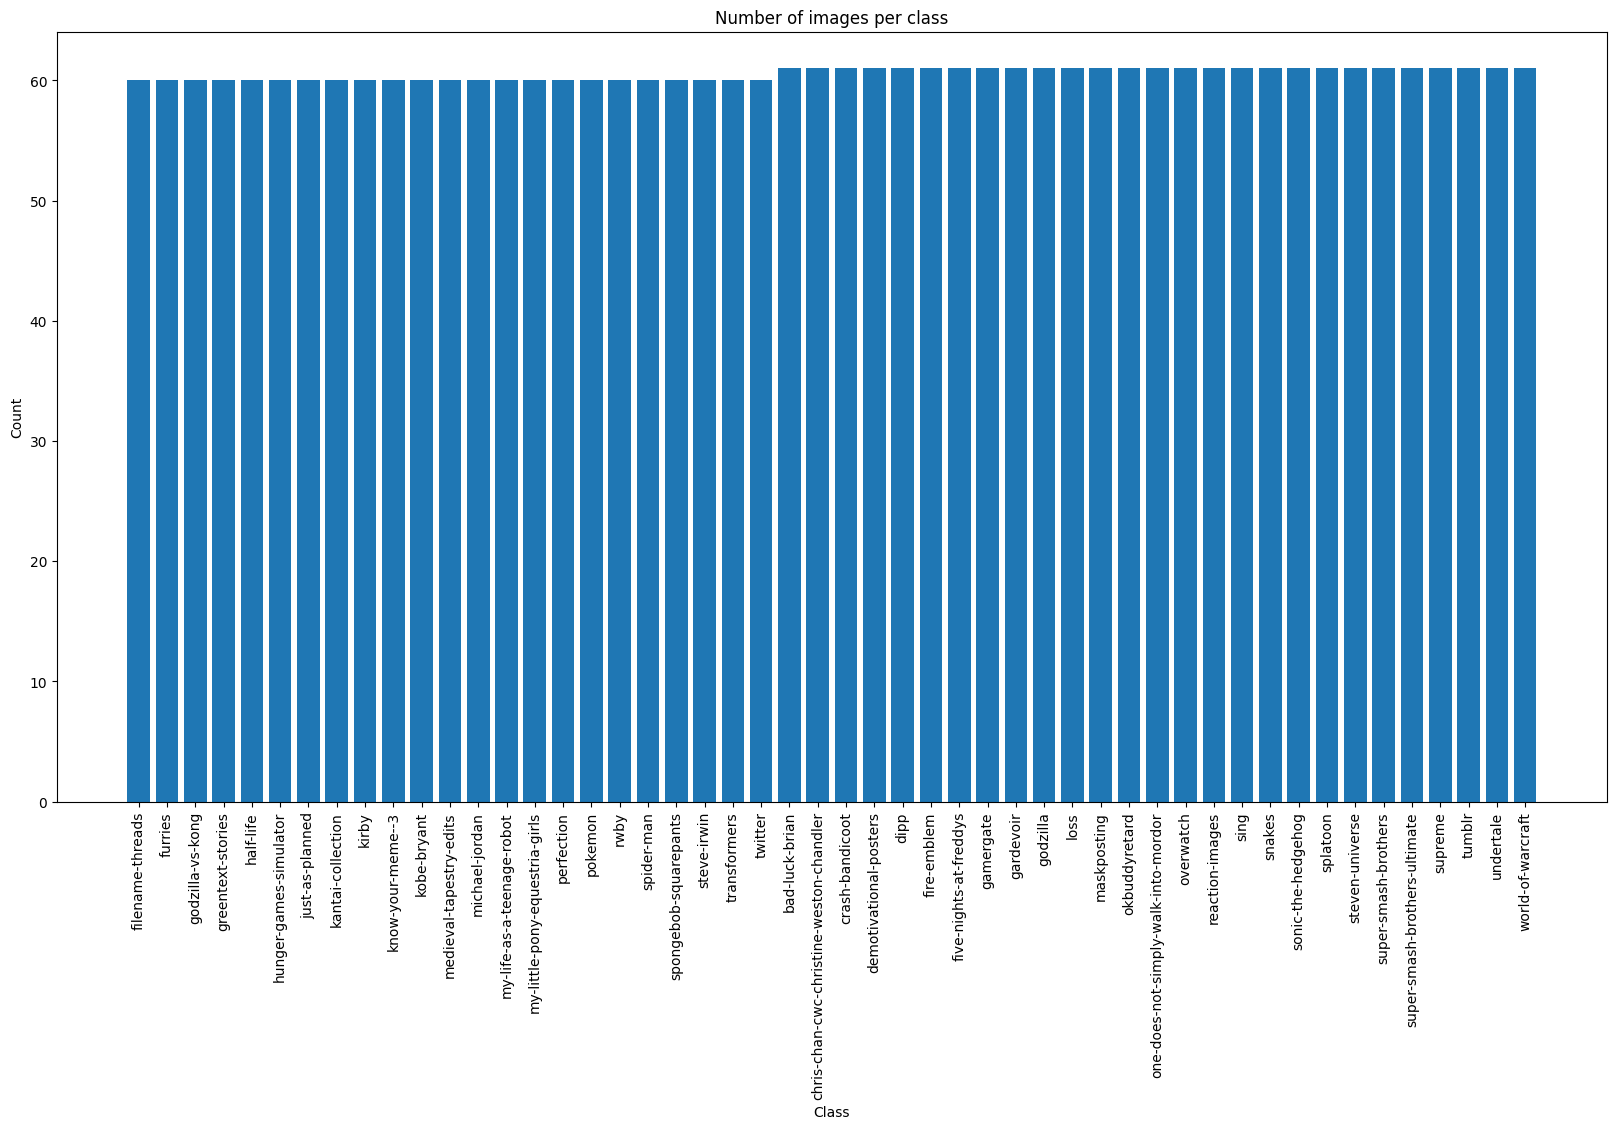

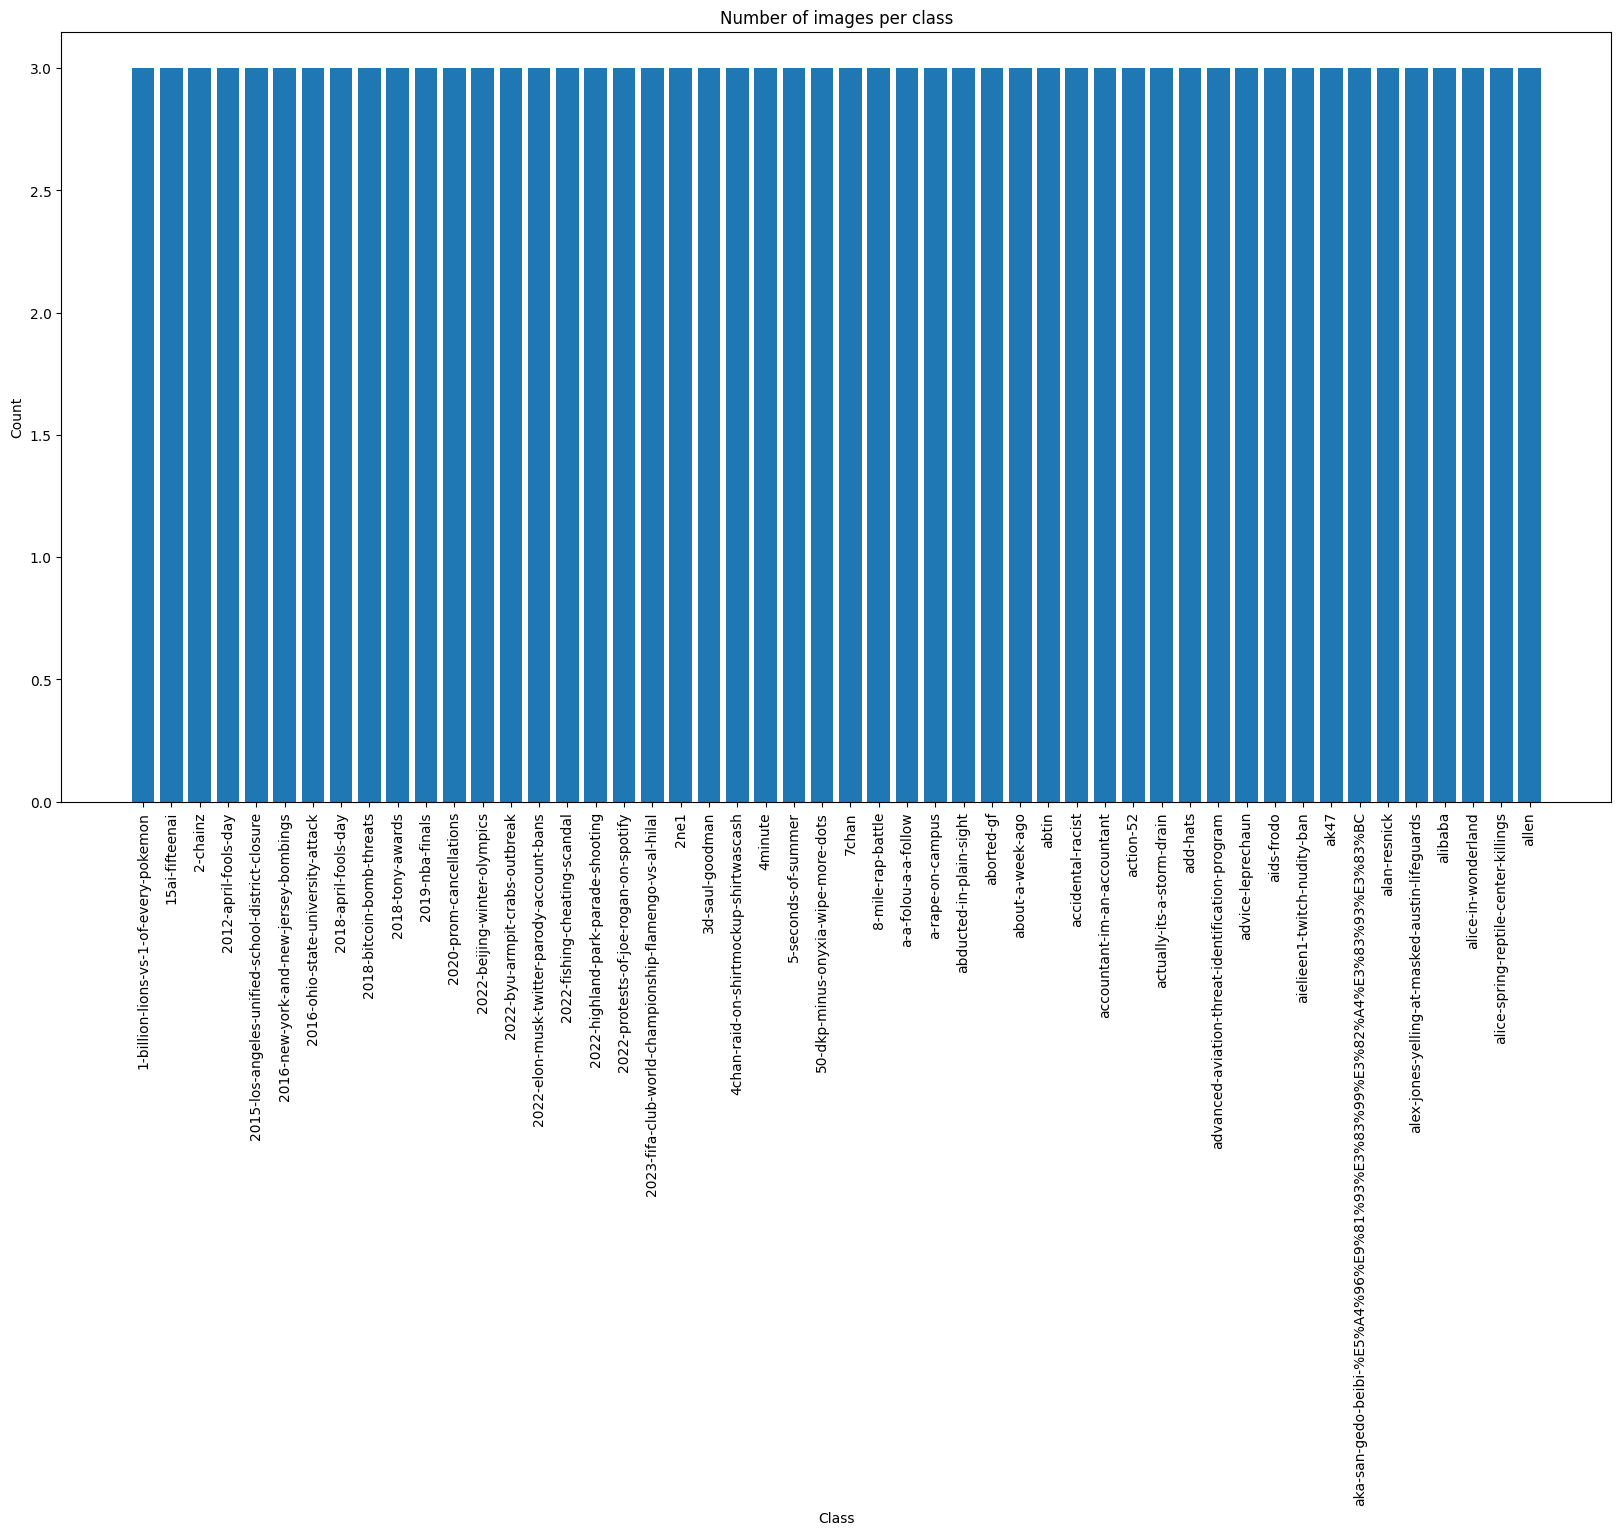

KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

train_file_counts = pd.read_csv('C:/Users/Murgi/Documents/GitHub/meme_research/outputs/train_file_counts.csv')
train_file_counts = {row['Class']: row['Count'] for row in train_file_counts.to_dict(orient='records')}
num_classes = len(train_class_counts)

val_file_counts = pd.read_csv('C:/Users/Murgi/Documents/GitHub/meme_research/outputs/val_file_counts.csv')
val_file_counts = {row['Class']: row['Count'] for row in val_file_counts.to_dict(orient='records')}

#Add the values of val_file_counts to train_file_counts
combined_file_counts = {k: train_file_counts[k] + val_file_counts[k] for k in train_file_counts.keys()}
#Sort the combined file counts
combined_file_counts = dict(sorted(combined_file_counts.items(), key=lambda item: item[1]))

#Sum of all values in combined_file_counts
sum_of_values = sum(combined_file_counts.values())
print(f'We have {sum_of_values} images in total.')

#Create a bar chart of the combined file counts
# Show only the top 20 classes
plt.figure(figsize=(20, 10))
plt.bar(list(combined_file_counts.keys())[-50:], list(combined_file_counts.values())[-50:])
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of images per class')
plt.show()

# Create a bar chart for the last 20 classes
plt.figure(figsize=(20, 10))
plt.bar(list(combined_file_counts.keys())[:50], list(combined_file_counts.values())[:50])
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of images per class')
plt.show()

plt.figure(figsize=(20, 10))
plt.bar(list(combined_file_counts.keys()), list(combined_file_counts.values()))
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of images per class')
plt.show()


Check dataset if there are any corrupted images to replace them
---------------------------------------------------------------

In [63]:
import os
from PIL import Image

# Directory where the images are stored
train_folder = 'D:/Memes2023_splitted/finetuning/train/'
val_folder = 'D:/Memes2023_splitted/finetuning/val/'

corrupt_files = []

for folder in [train_folder, val_folder]:
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
                file_path = os.path.join(subdir, file)
                try:
                    img = Image.open(file_path)  # open the image file
                    img.verify()  # verify that it is, in fact an image
                except (IOError, SyntaxError) as e:
                    corrupt_files.append(file_path)
                    print('Bad file:', file_path)  # print out the names of corrupt files

# Save the corrupt files to a text file
with open('corrupt_files.txt', 'w') as f:
    for file in corrupt_files:
        f.write(file + '\n')

Bad file: D:/Memes2023_splitted/finetuning/train/connect-four\connect-four_17.png
Bad file: D:/Memes2023_splitted/finetuning/train/duct-tape-banana\duct-tape-banana_11.png
Bad file: D:/Memes2023_splitted/finetuning/train/eizouken-opening-parodies\eizouken-opening-parodies_1.png
Bad file: D:/Memes2023_splitted/finetuning/train/eizouken-opening-parodies\eizouken-opening-parodies_7.png
Bad file: D:/Memes2023_splitted/finetuning/train/eizouken-opening-parodies\eizouken-opening-parodies_8.png
Bad file: D:/Memes2023_splitted/finetuning/train/eizouken-opening-parodies\eizouken-opening-parodies_9.png
Bad file: D:/Memes2023_splitted/finetuning/train/etikas-suicide\etikas-suicide_10.png
Bad file: D:/Memes2023_splitted/finetuning/train/etikas-suicide\etikas-suicide_13.png
Bad file: D:/Memes2023_splitted/finetuning/train/glitch-techs\glitch-techs_9.png
Bad file: D:/Memes2023_splitted/finetuning/train/jack-o-crouch-jack-o-challenge\jack-o-crouch-jack-o-challenge_8.png
Bad file: D:/Memes2023_splitte

c:\Users\Murgi\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


Bad file: D:/Memes2023_splitted/finetuning/val/kurzgesagt-in-a-nutshell\kurzgesagt-in-a-nutshell_0.png
Bad file: D:/Memes2023_splitted/finetuning/val/perfect-splits\perfect-splits_15.jpg


c:\Users\Murgi\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (134217728 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Replace corrupted images with their repaired versions
-----------------------------------------------------

In [70]:
import os
from PIL import Image

folder = 'C:/Users/Murgi/Downloads/repaired-val/repaired-val'
# Directory where the images are stored
corrupt_files = []
for subdir, dirs, files in os.walk(folder):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)  # open the image file
                img.verify()  # verify that it is, in fact an image
            except (IOError, SyntaxError) as e:
                corrupt_files.append(file_path)
                print('Bad file:', file_path)  # print out the names of corrupt files

print(corrupt_files)

[]


In [71]:
import shutil
train_folder_path = "D:/Memes2023_splitted/finetuning/train"
val_folder_path = "D:/Memes2023_splitted/finetuning/val"
for file in os.listdir(folder):
    cls = file.split('_')[0]
    class_folder_path = os.path.join(val_folder_path, cls)
    shutil.copy(os.path.join(folder, file), os.path.join(class_folder_path, file))
    print('File copied to', os.path.join(class_folder_path, file))    

File copied to D:/Memes2023_splitted/finetuning/val\eizouken-opening-parodies\eizouken-opening-parodies_repaired5.png
File copied to D:/Memes2023_splitted/finetuning/val\eizouken-opening-parodies\eizouken-opening-parodies_repaired6.png
File copied to D:/Memes2023_splitted/finetuning/val\gus-johnson\gus-johnson_repaired.png
File copied to D:/Memes2023_splitted/finetuning/val\half-life\half-life_repaired.png
File copied to D:/Memes2023_splitted/finetuning/val\kurzgesagt-in-a-nutshell\kurzgesagt-in-a-nutshell_repaired.png


Convert the dataset to HDF5 format
----------------------------------

In [2]:
import os
import h5py
from PIL import Image
import numpy as np
from tqdm import tqdm
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

hdf5_file_path = 'D:/Memes2023/dataset.hdf5'
root = "D:/Memes2023_splitted/finetuning"
corrupted = []

def create_hdf5_file(root, hdf5_file_path):
    # Create an HDF5 file to store the dataset
    with h5py.File(hdf5_file_path, 'w') as f:
        for subdir, dirs, files in tqdm(os.walk(root), total=410674):
            for file in files:
                try:
                    # Ensure the file is an image
                    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                        file_path = os.path.join(subdir, file)
                        # Get the class name from the file path
                        class_name = os.path.basename(os.path.dirname(file_path))
                        # Open the image using PIL
                        img = Image.open(file_path)
                        img_arr = np.array(img)
                        # Create a group for each class
                        if class_name not in f:
                            class_group = f.create_group(class_name)
                        else:
                            class_group = f[class_name]
                        # Save the image to the group
                        class_group.create_dataset(file, data=img_arr)
                except:
                    print("Corrupted file: ", file_path)
                    corrupted.append(file_path)
                    continue


create_hdf5_file(root, hdf5_file_path)
# save the corrupted files to a text file
with open('corrupted.txt', 'w') as f:
    for item in corrupted:
        f.write("%s\n" % item)

  6%|▌         | 23854/410674 [13:13:07<34:44:34,  3.09it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\after-like-fireworks\after-like-fireworks_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\after-like-fireworks\after-like-fireworks_ref.jfif.jpg.jpg


  6%|▌         | 24122/410674 [13:16:22<47:47:53,  2.25it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\ambien-walrus\ambien-walrus_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ambien-walrus\ambien-walrus_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ambien-walrus\ambien-walrus_ref.gif.jpg.jpg


  6%|▌         | 24225/410674 [13:18:27<533:27:01,  4.97s/it]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\and-then-theres-chunky-hes-dead\and-then-theres-chunky-hes-dead_ref.jfif.jpg


  6%|▌         | 24226/410674 [13:18:27<395:54:35,  3.69s/it]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\and-then-theres-chunky-hes-dead\and-then-theres-chunky-hes-dead_ref.jfif.jpg.jpg


  6%|▌         | 25303/410674 [13:32:57<13:36:21,  7.87it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\beyonces-renaissance-world-tour\beyonces-renaissance-world-tour_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\beyonces-renaissance-world-tour\beyonces-renaissance-world-tour_ref.jfif.jpg.jpg


  6%|▋         | 25769/410674 [13:39:25<45:46:07,  2.34it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\bora-bill\bora-bill_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\bora-bill\bora-bill_ref.jfif.jpg.jpg


  6%|▋         | 25951/410674 [13:40:47<49:22:48,  2.16it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\bring-on-21-june\bring-on-21-june_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\bring-on-21-june\bring-on-21-june_ref.jfif.jpg.jpg


  6%|▋         | 26084/410674 [13:42:09<31:15:45,  3.42it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\bukit-batok-manhole-explosion\bukit-batok-manhole-explosion_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\bukit-batok-manhole-explosion\bukit-batok-manhole-explosion_ref.jfif.jpg.jpg


  6%|▋         | 26415/410674 [13:47:52<58:01:19,  1.84it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\cassie-is-learning-from-me\cassie-is-learning-from-me_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\cassie-is-learning-from-me\cassie-is-learning-from-me_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\cassie-is-learning-from-me\cassie-is-learning-from-me_ref.gif.jpg.jpg


  7%|▋         | 27647/410674 [14:04:47<153:43:10,  1.44s/it] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\dancing-inuyasha\dancing-inuyasha_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\dancing-inuyasha\dancing-inuyasha_ref.gif.jpg


  7%|▋         | 27648/410674 [14:04:47<124:19:59,  1.17s/it]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\dancing-inuyasha\dancing-inuyasha_ref.gif.jpg.jpg


  7%|▋         | 28022/410674 [14:11:18<46:23:26,  2.29it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\di-yan-pwede-kay-enrile\di-yan-pwede-kay-enrile_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\di-yan-pwede-kay-enrile\di-yan-pwede-kay-enrile_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\di-yan-pwede-kay-enrile\di-yan-pwede-kay-enrile_ref.gif.jpg.jpg


  7%|▋         | 30514/410674 [14:47:04<23:42:48,  4.45it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\ghost-duet\ghost-duet_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ghost-duet\ghost-duet_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ghost-duet\ghost-duet_ref.gif.jpg.jpg


  8%|▊         | 30923/410674 [14:54:32<42:35:21,  2.48it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\grace-helbig\grace-helbig_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\grace-helbig\grace-helbig_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\grace-helbig\grace-helbig_ref.gif.jpg.jpg


  8%|▊         | 31307/410674 [14:59:34<53:03:29,  1.99it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\harry-potter-and-the-d\harry-potter-and-the-d_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\harry-potter-and-the-d\harry-potter-and-the-d_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\harry-potter-and-the-d\harry-potter-and-the-d_ref.gif.jpg.jpg


  8%|▊         | 31537/410674 [15:05:35<47:19:42,  2.23it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\hes-dead\hes-dead_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\hes-dead\hes-dead_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\hes-dead\hes-dead_ref.gif.jpg.jpg


  8%|▊         | 31987/410674 [15:09:23<41:26:50,  2.54it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\humpy-hank\humpy-hank_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\humpy-hank\humpy-hank_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\humpy-hank\humpy-hank_ref.gif.jpg.jpg


  8%|▊         | 32516/410674 [15:17:11<76:56:10,  1.37it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\ichigo-scream\ichigo-scream_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ichigo-scream\ichigo-scream_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ichigo-scream\ichigo-scream_ref.gif.jpg.jpg


  8%|▊         | 33233/410674 [15:27:07<30:49:37,  3.40it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\its-funny-because-____\its-funny-because-_____ref.GIF
Corrupted file:  D:/Memes2023_splitted/finetuning\val\its-funny-because-____\its-funny-because-_____ref.GIF.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\its-funny-because-____\its-funny-because-_____ref.GIF.jpg.jpg


  8%|▊         | 34096/410674 [15:40:23<45:47:35,  2.28it/s]  c:\Users\Murgi\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
  9%|▊         | 35929/410674 [16:06:05<64:55:23,  1.60it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\michael-p\michael-p_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\michael-p\michael-p_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\michael-p\michael-p_ref.gif.jpg.jpg


  9%|▉         | 36894/410674 [16:23:35<31:24:46,  3.31it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\next-time-mister-fox\next-time-mister-fox_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\next-time-mister-fox\next-time-mister-fox_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\next-time-mister-fox\next-time-mister-fox_ref.gif.jpg.jpg


  9%|▉         | 37464/410674 [16:31:43<273:42:31,  2.64s/it] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\oh-my-god-becky\oh-my-god-becky_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\oh-my-god-becky\oh-my-god-becky_ref.gif.jpg


  9%|▉         | 37465/410674 [16:31:44<213:45:47,  2.06s/it]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\oh-my-god-becky\oh-my-god-becky_ref.gif.jpg.jpg


  9%|▉         | 37933/410674 [16:39:02<36:07:25,  2.87it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\papa-tutu-wawa\papa-tutu-wawa_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\papa-tutu-wawa\papa-tutu-wawa_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\papa-tutu-wawa\papa-tutu-wawa_ref.gif.jpg.jpg


 10%|▉         | 39145/410674 [16:57:04<42:14:11,  2.44it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\rbd-reunion-rebelde-world-tour-2023\rbd-reunion-rebelde-world-tour-2023_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\rbd-reunion-rebelde-world-tour-2023\rbd-reunion-rebelde-world-tour-2023_ref.jfif.jpg.jpg


 10%|▉         | 40167/410674 [17:12:01<76:30:28,  1.35it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\selfliking\selfliking_ref.GIF
Corrupted file:  D:/Memes2023_splitted/finetuning\val\selfliking\selfliking_ref.GIF.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\selfliking\selfliking_ref.GIF.jpg.jpg


 10%|█         | 41511/410674 [17:31:01<48:56:39,  2.10it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\stick-splice\stick-splice_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\stick-splice\stick-splice_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\stick-splice\stick-splice_ref.gif.jpg.jpg


 10%|█         | 41558/410674 [17:31:19<57:30:45,  1.78it/s]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\stop-eating-my-sesame-cake\stop-eating-my-sesame-cake_ref.gif


 10%|█         | 41559/410674 [17:31:20<62:11:08,  1.65it/s]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\stop-eating-my-sesame-cake\stop-eating-my-sesame-cake_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\stop-eating-my-sesame-cake\stop-eating-my-sesame-cake_ref.gif.jpg.jpg


 10%|█         | 41770/410674 [17:36:36<63:51:53,  1.60it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\super-smash-bros-for-wii-u-synchronized-dancing\super-smash-bros-for-wii-u-synchronized-dancing_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\super-smash-bros-for-wii-u-synchronized-dancing\super-smash-bros-for-wii-u-synchronized-dancing_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\super-smash-bros-for-wii-u-synchronized-dancing\super-smash-bros-for-wii-u-synchronized-dancing_ref.gif.jpg.jpg


 10%|█         | 42014/410674 [17:39:23<25:22:47,  4.03it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\taylor-swift-x-football-edits\taylor-swift-x-football-edits_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\taylor-swift-x-football-edits\taylor-swift-x-football-edits_ref.jfif.jpg.jpg


 10%|█         | 42407/410674 [17:45:28<28:53:14,  3.54it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-dab-police\the-dab-police_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-dab-police\the-dab-police_ref.jfif.jpg.jpg


 10%|█         | 42822/410674 [17:52:25<48:47:39,  2.09it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-real-sugar-baby\the-real-sugar-baby_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-real-sugar-baby\the-real-sugar-baby_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-real-sugar-baby\the-real-sugar-baby_ref.gif.jpg.jpg


 10%|█         | 42887/410674 [17:52:58<39:01:22,  2.62it/s]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-stages-of-fangirling\the-stages-of-fangirling_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-stages-of-fangirling\the-stages-of-fangirling_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\the-stages-of-fangirling\the-stages-of-fangirling_ref.gif.jpg.jpg


 11%|█         | 43340/410674 [17:59:38<29:09:22,  3.50it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\tia-paola\tia-paola_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\tia-paola\tia-paola_ref.jfif.jpg.jpg


 11%|█         | 43385/410674 [18:00:15<25:12:24,  4.05it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\time-lapse-photography\time-lapse-photography_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\time-lapse-photography\time-lapse-photography_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\time-lapse-photography\time-lapse-photography_ref.gif.jpg.jpg


 11%|█         | 43866/410674 [18:05:00<30:35:01,  3.33it/s] c:\Users\Murgi\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (134217728 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
 11%|█         | 44873/410674 [18:22:46<34:31:29,  2.94it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-the-fuck-is-a-sonic\what-the-fuck-is-a-sonic_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-the-fuck-is-a-sonic\what-the-fuck-is-a-sonic_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-the-fuck-is-a-sonic\what-the-fuck-is-a-sonic_ref.gif.jpg.jpg


 11%|█         | 44885/410674 [18:22:54<31:24:55,  3.23it/s] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-would-brian-boitano-do\what-would-brian-boitano-do_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-would-brian-boitano-do\what-would-brian-boitano-do_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\what-would-brian-boitano-do\what-would-brian-boitano-do_ref.gif.jpg.jpg


 11%|█         | 45399/410674 [18:30:30<29:05:30,  3.49it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\workout\workout_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\workout\workout_ref.gif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\workout\workout_ref.gif.jpg.jpg


 11%|█         | 45564/410674 [18:34:09<715:48:09,  7.06s/it] 

Corrupted file:  D:/Memes2023_splitted/finetuning\val\xqc-wow-clap\xqc-wow-clap_ref.gif
Corrupted file:  D:/Memes2023_splitted/finetuning\val\xqc-wow-clap\xqc-wow-clap_ref.gif.jpg


 11%|█         | 45565/410674 [18:34:09<509:24:42,  5.02s/it]

Corrupted file:  D:/Memes2023_splitted/finetuning\val\xqc-wow-clap\xqc-wow-clap_ref.gif.jpg.jpg


 11%|█         | 46047/410674 [18:49:04<93:50:54,  1.08it/s]  

Corrupted file:  D:/Memes2023_splitted/finetuning\val\ytietvietnamese-numbers-guy\ytietvietnamese-numbers-guy_ref.jfif.jpg
Corrupted file:  D:/Memes2023_splitted/finetuning\val\ytietvietnamese-numbers-guy\ytietvietnamese-numbers-guy_ref.jfif.jpg.jpg


 11%|█         | 46167/410674 [18:51:28<148:53:26,  1.47s/it]


Verify the HDF5 dataset
-----------------------

Check the number of classes and images in the dataset

In [ ]:
import h5py

hdf5_file_path = 'D:/Memes2023/dataset.hdf5'

with h5py.File(hdf5_file_path, 'r') as f:
    num_classes = len(f.keys())
    num_images = sum(len(f[class_name]) for class_name in f.keys())
    print(f'Number of classes: {num_classes}')
    print(f'Number of images: {num_images}')

Inscpecting the dataset

In [ ]:
import matplotlib.pyplot as plt

with h5py.File(hdf5_file_path, 'r') as f:
    # Choose a random class
    class_name = random.choice(list(f.keys()))
    class_group = f[class_name]
    # Choose a random image from the class
    image_name = random.choice(list(class_group.keys()))
    img_data = class_group[image_name][()]
    # Display the image
    plt.imshow(img_data)
    plt.title(f'Class: {class_name}, Image: {image_name}')
    plt.show()


Caching the paths to the images in our dataset
---------------------------------------------

In [3]:
import os
import pickle
from tqdm import tqdm 

# First time only: create and save the list of image paths
img_train_path_file = 'C:/Users/Murgi/Documents/GitHub/meme_research/outputs/cache/image_train_paths.pkl'
img_val_path_file = 'C:/Users/Murgi/Documents/GitHub/meme_research/outputs/cache/image_val_paths.pkl'
img_train_dir = 'D:/Memes2023_splitted/finetuning/train'
img_val_dir = 'D:/Memes2023_splitted/finetuning/val'


def cache_image_paths(img_dir, cache_path):
    print(f'Caching image paths in {img_dir}')
    img_label_pairs = []
    for root, dirs, files in tqdm(os.walk(img_dir), total=23083):
        for fname in files:
            img_label_pairs.append((os.path.join(root, fname), os.path.basename(root)))
    with open(cache_path, 'wb') as f:
        pickle.dump(img_label_pairs, f)
    print(f'Cached {len(img_label_pairs)} paths to {cache_path}')

cache_image_paths(img_train_dir, img_train_path_file)
cache_image_paths(img_val_dir, img_val_path_file)

Caching image paths in D:/Memes2023_splitted/finetuning/train


100%|██████████| 23083/23083 [00:08<00:00, 2779.24it/s]


Cached 319466 paths to C:/Users/Murgi/Documents/GitHub/meme_research/outputs/cache/image_train_paths.pkl
Caching image paths in D:/Memes2023_splitted/finetuning/val


100%|██████████| 23083/23083 [00:03<00:00, 7156.16it/s]

Cached 91205 paths to C:/Users/Murgi/Documents/GitHub/meme_research/outputs/cache/image_val_paths.pkl
